# Thuật toán K-nearest neighbors

source:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://machinelearningcoban.com/2017/01/08/knn/
 
KNN, trong bài toán classification, nhãn của một điểm dữ liệu mới được suy ra trực tiếp từ K điểm dữ liệu gần nhất trong tập huấn luyện.
1. KNN là thuật toán lazy learning, không có hàm mất mát và không có bài toán tối ưu phải thực hiện trong quá trình huấn luyện.
2. Mỗi điểm dữ liệu được thể hiện bằng một vector đặc trưng và khoảng cách giữa hai điểm chính là khoảng cách giữa hai vector đó.
3. KNN sẽ tính khoảng cách từ một điểm dữ liệu mới z đến N điểm dữ liệu đã cho và chọn ra K khoảng cách nhỏ nhất.

In [1]:
# cài đặt thư viện
import numpy as np
from time import time
d, N = 1000, 10000
X = np.random.randn(N,d)
z = np.random.randn(d)

In [2]:
# naively compute square distance between two vector 
def dist_pp(z, x): 
    d = z - x.reshape(z.shape) # force x and z to have the same dims 
    return np.sum(d*d)

# from one point to each point in a set, naive 
def dist_ps_naive(z, X):
    N = X.shape[0]
    res = np.zeros((1, N)) 
    for i in range(N):
        res[0][i] = dist_pp(z, X[i])
    return res 

# from one point to each point in a set, fast
def dist_ps_fast(z, X):
    X2 = np.sum(X*X, 1) # squared of norm 2 of each ROW of X
    z2 = np.sum(z*z) # squared of norm 2 of z 
    return X2 + z2 - 2*X.dot(z)

t1 = time() 
D1 = dist_ps_naive(z, X)
print('naive point2set, running time:', time() - t1, 's')

t1 = time() 
D2 = dist_ps_fast(z, X)
print('fast point2set , running time:', time() - t1, 's')
print('Result difference:', np.linalg.norm(D1 - D2))

naive point2set, running time: 0.11867952346801758 s
fast point2set , running time: 0.06782221794128418 s
Result difference: 2.1601695837514164e-11


In [3]:
#test
'''X = np.array([[1,2,3],[4,5,6]])
z = np.array([2,4,6])
X1 = np.sum(X*X, axis = 1)
z1 = np.sum(z*z)
print(X1)
print(z1)
print(X1 + z1)
print(X1.dot(z1))'''

'X = np.array([[1,2,3],[4,5,6]])\nz = np.array([2,4,6])\nX1 = np.sum(X*X, axis = 1)\nz1 = np.sum(z*z)\nprint(X1)\nprint(z1)\nprint(X1 + z1)\nprint(X1.dot(z1))'

Tính khoảng cách giữ nhiều điểm của tập Z tới X. Tính khoảng cách từng điểm trong tập kiểm thử và một điểm trong tập huấn luyện

In [4]:
M = 100 
Z = np.random.randn(M, d)

# from each point in one set to each point in another set, half fast 
def dist_ss_0(Z, X):
    M = Z.shape[0]
    N = X.shape[0]
    res = np.zeros((M, N))
    for i in range(M):
        res[i] = dist_ps_fast(Z[i], X)
    return res 

# from each point in one set to each point in another set, fast 
def dist_ss_fast(Z, X):
    X2 = np.sum(X*X, 1) # squared of norm 2 of each ROW of X
    Z2 = np.sum(Z*Z, 1) # squared of norm 2 of each ROW of Z
    return Z2.reshape(-1, 1) + X2.reshape(1, -1) - 2*Z.dot(X.T)

t1 = time() 
D3 = dist_ss_0(Z, X)
print('half fast set2set running time:', time() - t1, 's')
t1 = time() 
D4 = dist_ss_fast(Z, X)
print('fast set2set  running time', time() - t1, 's')
print('Result difference:', np.linalg.norm(D3 - D4))

half fast set2set running time: 8.173517227172852 s
fast set2set  running time 0.1281731128692627 s
Result difference: 9.646889229340265e-11


In [5]:
print(dist_ss_0(Z,X))

[[2052.71391694 2068.41499221 2056.56289702 ... 1998.39890535
  2107.77317033 2058.73620249]
 [2108.20177421 2106.85202485 2078.73415478 ... 1986.08792534
  2186.66529148 2121.74574856]
 [1906.32541559 2044.65372376 2004.13648431 ... 1896.20736216
  2034.78037916 2016.38298148]
 ...
 [1843.69519515 1969.85424384 1884.54602366 ... 1886.45363581
  1932.12508225 2017.15346112]
 [1993.22015362 1903.09024426 1934.89817184 ... 1986.36418628
  1918.87785169 2052.00145293]
 [2069.64570467 1980.31072086 2136.83823285 ... 1905.94310403
  2027.38066538 2052.84565576]]


In [6]:
print(dist_ss_fast(Z,X))

[[2052.71391694 2068.41499221 2056.56289702 ... 1998.39890535
  2107.77317033 2058.73620249]
 [2108.20177421 2106.85202485 2078.73415478 ... 1986.08792534
  2186.66529148 2121.74574856]
 [1906.32541559 2044.65372376 2004.13648431 ... 1896.20736216
  2034.78037916 2016.38298148]
 ...
 [1843.69519515 1969.85424384 1884.54602366 ... 1886.45363581
  1932.12508225 2017.15346112]
 [1993.22015362 1903.09024426 1934.89817184 ... 1986.36418628
  1918.87785169 2052.00145293]
 [2069.64570467 1980.31072086 2136.83823285 ... 1905.94310403
  2027.38066538 2052.84565576]]


# KNN phân lớp trên cơ sở dữ liệu Iris
1. iris flower datasets là một bộ dữ liệu nhỏ, bao gồm thông tin của ba loài hoa: iris setosa, iris virginica và iris versicolor.
2. Mỗi class gồm có 50 bông hoa với dữ liệu là bốn thông tin.
3. Dữ liệu không phải là ảnh mà là vector đặc trưng bốn chiều.

In [7]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print("Labels:", np.unique(iris_y))

Labels: [0 1 2]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 130)
model = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2) # K =1, lấy 1 điểm, p = 2 lấy chuẩn 2 trong không gian Euclid
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of 1NN",100*(accuracy_score(y_test,y_pred)))
print(y_pred)

Accuracy of 1NN 93.84615384615384
[0 1 1 0 2 0 2 1 2 0 0 1 2 0 0 2 1 1 0 2 1 2 2 2 0 2 2 0 0 2 2 0 0 2 1 0 0
 1 1 0 1 2 1 2 2 2 0 0 1 2 0 0 0 1 2 2 1 0 2 0 2 0 0 0 0 2 1 1 2 2 2 1 2 1
 2 2 0 0 1 1 2 2 2 1 2 0 2 2 2 2 0 1 1 2 0 1 2 0 1 2 2 1 1 1 0 2 1 2 2 0 1
 2 1 0 2 1 1 0 0 1 2 0 0 1 2 1 0 2 0 1]


In [10]:
def scoremodel(y_test,y_pred):
    dem = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            dem = dem +1
    a = dem/len(y_test)
    return a

In [11]:
print(100*scoremodel(y_test,y_pred),"%")

93.84615384615384 %


# KNN phân lớp điểm trên mặt phẳng
Phân loại 1500 điểm trên mặt phẳng, với kì vọng và phương sai có sẵn.

In [12]:
import random
N = 500
means = [[2,2],[8,3],[2,2.5]]
cov = [[0.1,0],[0,0.1]]
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

In [13]:
# Tạo dữ liệu
X = np.concatenate((X0,X1,X2))
y = np.concatenate(([0]*500,[1]*500,[2]*500))  
print(X)
print(y)

[[1.82037948 2.30834595]
 [2.49650676 1.54467325]
 [2.51194617 1.96889218]
 ...
 [1.24220399 2.63150918]
 [2.33088278 2.5326544 ]
 [2.14534097 2.43191386]]
[0 0 0 ... 2 2 2]


In [14]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # train = 80%, test = 20%
print("Train size:",X_train.shape[0],"Test_size:",X_test.shape[0])
print("Labels:",np.unique(y))

Train size: 1200 Test_size: 300
Labels: [0 1 2]


In [15]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3,p =2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(100*accuracy_score(y_test,y_pred),"%")

81.66666666666667 %


# KNN phân loại chữ số
Bộ dữ liệu sklearn.datasets.load_digits.
1. 10 class : số 0 đến số 9
2. Mỗi class khoảng 180 số, tổng số dữ liệu : 1797
3. Một feature có kích cỡ là 64: mảng số nguyên từ 0 đến 16


Đọc dữ liệu

In [31]:
from sklearn import datasets, neighbors
X_digits, y_digits = datasets.load_digits(return_X_y=True)
print(X_digits)
print(y_digits)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


Hiển thị dữ liệu trực quan

<Figure size 432x288 with 0 Axes>

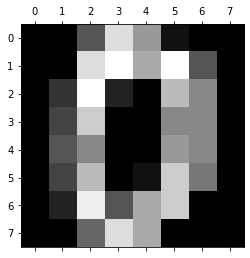

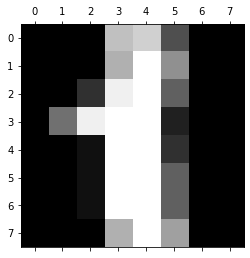

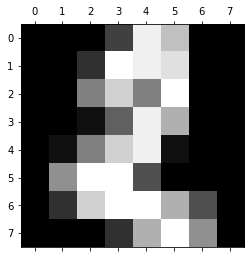

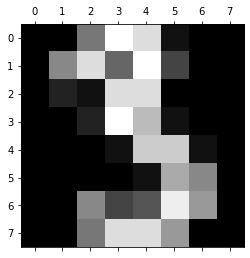

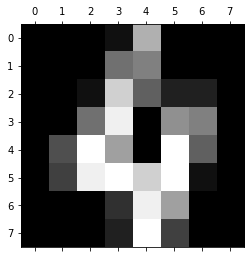

In [38]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 
    plt.show() 

In [90]:
X_digits = X_digits / X_digits.max()
n_samples = len(X_digits)
X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]
print(y_test)
print(X_train.shape)

[5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7
 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3
 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4
 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
(1617, 64)


In [91]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred)


[5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7
 2 2 5 7 3 5 8 4 5 0 8 9 7 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 2
 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4
 5 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 1 4 9 0 8 9 8]


score của mô hình

In [92]:
print("KNN score:",100*accuracy_score(y_test,y_pred),"%")

KNN score: 96.11111111111111 %


In [93]:
def erropoint(y_test,y_pred):
    listindex = []
    listpoint  = dict()
    for i in range(len(y_test)):
        if y_test[i] != y_pred[i]:
            listpoint[y_test[i]] = y_pred[i]
            listindex.append(i)
    return listindex , listpoint

In [89]:
listindex1 , listpoint1 = erropoint(y_test,y_pred)
print(listindex1)
print(listpoint1)

[41, 43, 45, 49, 110, 148, 173]
{9: 5, 4: 8, 8: 1, 3: 5}


Show ảnh nhận diện sai

4


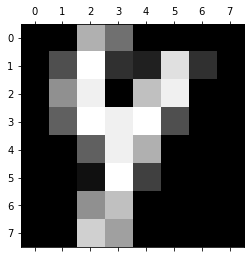

In [96]:
print(y_digits[1617+43])
plt.matshow(digits.images[1617+43]) 
plt.show() 